<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-perfect-model" data-toc-modified-id="The-perfect-model-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>The perfect model</a></span></li><li><span><a href="#Training-baseline-model" data-toc-modified-id="Training-baseline-model-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Training baseline model</a></span></li><li><span><a href="#Sklearn" data-toc-modified-id="Sklearn-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Sklearn</a></span></li><li><span><a href="#Training-challenger-model" data-toc-modified-id="Training-challenger-model-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Training challenger model</a></span></li></ul></li><li><span><a href="#Testing-paper-example" data-toc-modified-id="Testing-paper-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing paper example</a></span></li><li><span><a href="#Different-equations" data-toc-modified-id="Different-equations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Different equations</a></span></li><li><span><a href="#Different-structure" data-toc-modified-id="Different-structure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Different structure</a></span></li><li><span><a href="#Sanity-checks,-Understanding-the-loss-functions'-behavior" data-toc-modified-id="Sanity-checks,-Understanding-the-loss-functions'-behavior-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sanity checks, Understanding the loss functions' behavior</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb

from sklearn.datasets import make_classification

In [2]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rcParams['figure.figsize'] = (12, 4)
    plt.rcParams['legend.fontsize'] = 12
    
    
set_style()

In [3]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

In [4]:
LEARNING_RATE = 1e-3

In [5]:
def cost_function(X, y, theta):
    m = len(y)
    y_hat = X @ theta
    cost = (1/m) * np.sum(((y_hat - y) ** 2))
    return cost

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations, 1))

    for i in range(iterations):
        envs = np.unique(X[:, -1])        
        params = params - (learning_rate/m) * np.sum(((X @ params - y).reshape(-1, 1) * X), axis=0)
        cost_history[i] = cost_function(X, y, params)

    return (cost_history, params)

In [7]:
def predict(X, params):
    return X @ params


$$ x_{1} \sim \mathbb{N}(0, \text{period}) $$
$$ y \sim 3 * x_{1} + \mathbb{N}(0, \text{period}) $$
$$ x_{2} \sim y + \mathbb{N}(0, 1) $$

In [8]:
np.__version__

'1.19.2'

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import default_rng

rng = default_rng()

X2_DEFINITION = {lambda x: x + np.random.normal(0, 1, 1), 
                 lambda x: 13}
POPULATION = 20000
PERIODS = 8
ENV_FACTORS = rng.choice(PERIODS, size=PERIODS, replace=False)
print(ENV_FACTORS)
x_1 = np.concatenate(
    [np.random.normal(
        0, period, size=int(POPULATION/PERIODS)).flatten() for period in range(PERIODS)],
    axis=0)

data = pd.DataFrame()
data["x_1"] = x_1
mm = MinMaxScaler()
data["x_1"] = mm.fit_transform(data[["x_1"]])
data["period"] = np.concatenate([int(POPULATION/PERIODS) * [period] for period in range(PERIODS)],
                               axis=0)
data["y"] = data.apply(lambda x: x["x_1"] + np.random.normal(0, x["period"]), axis=1)
data["x_2"] = data["y"] + np.random.normal(0, 1, size=POPULATION).flatten()

mm = MinMaxScaler()
features = ["x_2"]
environment = "period"
target = "y"
data["x_2"] = mm.fit_transform(data[["x_2"]])
features = ["x_1", "x_2"]
unseen_periods = [5, 6]
unseen_data = data[data[environment].isin(unseen_periods)]
data = data[~data[environment].isin(unseen_periods)]
unseen_data["x_2"] = unseen_data.apply(lambda x: 0.5 + np.random.normal(0, 0.2, 1), axis=1)

print(unseen_data.shape)
print(data.shape)

data.tail()

[7 3 5 1 4 6 2 0]
(5000, 4)
(15000, 4)


,x_1,period,y,x_2
19995,0.448443,7,8.152872,0.714194
19996,0.525598,7,5.164206,0.579317
19997,0.446085,7,-2.800059,0.433733
19998,0.531298,7,6.144673,0.611419
19999,0.588255,7,-5.698565,0.357856


In [10]:
periods = [0.1, 1]
data = pd.DataFrame()
data["period"] = np.concatenate([int(POPULATION/2) * [period] for period in periods],
                               axis=0)
data["x_1"] = data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
data["y"] = data.apply(lambda x: 1 * x["x_1"] + np.random.normal(0, 1) * x["period"], axis=1)
data["x_2"] = data.apply(lambda x: x["y"] + np.random.normal(0, 1), axis=1)

periods = [0.05, 0.02, 0.5, 1.2]
unseen_environments = periods
unseen_data = pd.DataFrame()
unseen_data["period"] = np.concatenate([int(POPULATION/2) * [period] for period in periods],
                               axis=0)
unseen_data["x_1"] = unseen_data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
unseen_data["y"] = unseen_data.apply(lambda x: 1 * x["x_1"] + np.random.normal(0, 1) * x["period"], axis=1)
unseen_data["x_2"] = unseen_data.apply(lambda x: np.random.normal(0, 1), axis=1)

In [11]:
data[data["period"] == 1]["x_1"].std()

0.9896780238833075

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[features + [environment]], 
                                                    data[target],
                                                    test_size=0.5,
                                                    stratify=data[environment],
                                                    random_state=42)

X_unseen = unseen_data[features + [environment]].values
y_unseen = unseen_data[target]

X = X_train[["x_1", "x_2", "period"]].values
X_test = X_test.values
y = y_train.values

print(X_train.shape)
print(X_test.shape)
print(X_unseen.shape)
print(y_train.shape)
print(y_test.shape)
print(y_unseen.shape)

(10000, 3)
(10000, 3)
(40000, 3)
(10000,)
(10000,)
(40000,)


### The perfect model

In [13]:
real_params = [1, 0]
y_hat_perfect_train = X[:, :-1] @ real_params
y_hat_perfect_test = X_test[:, :-1] @ real_params
y_hat_perfect_unseen = X_unseen[:, :-1] @ real_params

print("Training error: {}".format(mean_squared_error(y_train, y_hat_perfect_train)))
print("Test error: {}".format(mean_squared_error(y_test, y_hat_perfect_test)))
print("Unseen error: {}".format(mean_squared_error(y_unseen, y_hat_perfect_unseen)))

Training error: 0.5023610431107385
Test error: 0.5169113511643263
Unseen error: 0.4218484589259976


### Training baseline model

In [14]:
thetas = [1.0, 1.0]

In [15]:
errors, baseline_params = gradient_descent(X[:, :-1], y, thetas, 0.1, 5000)
print(baseline_params)
y_hat_baseline_train = X[:, :-1] @ baseline_params

[0.65401256 0.32917862]


In [16]:
y_hat_baseline = X_test[:, :-1] @ baseline_params

y_hat_baseline_unseen = X_unseen[:, :-1] @ baseline_params

In [17]:
print("Training error: {}".format(mean_squared_error(y_train, y_hat_baseline_train)))
print("Test error: {}".format(mean_squared_error(y_test, y_hat_baseline)))
print("Unseen error: {}".format(mean_squared_error(y_unseen, y_hat_baseline_unseen)))

Training error: 0.3385555595879836
Test error: 0.3403623028934177
Unseen error: 0.5793149246226712


### Sklearn

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False, n_jobs=-1)
model.fit(X[:, :-1], y)

y_hat_sklearn = model.predict(X[:, :-1])
y_hat_sklearn_test = model.predict(X_test[:, :-1])
y_hat_sklearn_unseen = model.predict(X_unseen[:, :-1])
model.coef_

array([0.65401256, 0.32917862])

In [19]:
print("Training error: {}".format(mean_squared_error(y_train, y_hat_sklearn)))
print("Test error: {}".format(mean_squared_error(y_test, y_hat_sklearn_test)))
print("Unseen error: {}".format(mean_squared_error(y_unseen, y_hat_sklearn_unseen)))

Training error: 0.33855555958798356
Test error: 0.3403623028934177
Unseen error: 0.5793149246226722


### Training challenger model

In [20]:
def irm_cost_function(X, y, params, lambda_penalty):
    envs = np.unique(X[:, -1])
    irm_cost = 0

    for env in envs:
        X_env = X[X[:, -1] == env, :-1]
        y_env = y[X[:, -1] == env]
        pred_env = X_env @ params
        error = mean_squared_error(y_env, pred_env)
        penalty = lambda_penalty * linear_loss(X_env, y_env, params)
        irm_cost += error + penalty

    return irm_cost

def mse_cost_function(X, y, params):
    return mean_squared_error(y, X[:, :-1] @ params)

def mse_cost_function_(X, y, params):
    return mean_squared_error(y, X @ params)

def linear_penalty_function(X, y, params):
    envs = np.unique(X[:, -1])
    total_penalty = 0
    for env in envs:
        X_env = X[X[:, -1] == env, :-1]
        y_env = y[X[:, -1] == env]
        total_penalty += penalty_fn(X_env, y_env, params)

    return total_penalty

    
def linear_loss(X, y, params):
    return np.power(np.mean((X @ params).T * (X @ params)) * np.array([1, 0]) - np.mean((X @ params).T * y), 2)[0]
    return np.mean(np.power((X @ params).T * (X @ params) - ((X @ params).T * y), 2))

def penalty_fn(X, y, params):
    m = len(y)
    g1 = -(1 / m) * 2 * np.sum(((X[0::2] @ params - y[0::2]).reshape(-1, 1) * X[0::2] @ params), axis=0)
    g2 = -(1 / m) * 2 * np.sum(((X[1::2] @ params - y[1::2]).reshape(-1, 1) * X[1::2] @ params), axis=0)
    
    return np.sum(g1 * g2)

def gradient_penalty(X, y, params):
    return 2 * (np.mean((X @ params).T * (X @ params)) - np.mean((X @ params).T * y)) * (2 * np.mean((X @ params).T.reshape(-1, 1) * X, axis=0) - np.mean((X.T) * y))

def invariant_risk_minimization(X, y, initial_params, learning_rate, iterations, X_unseen, y_unseen, verbose=True):
    m = len(y)
    cost_history = np.zeros((iterations, 1))
    all_params = []
    performances = []
    envs = np.unique(X[:, -1])
    lambdas = [0, 5e-1, 1, 2]

    experiment_dict = {}
    for lambda_ in lambdas:
        experiment_dict[lambda_]={}
        print("****************************************")
        print("Training with lambda: {}".format(lambda_))
        print("****************************************")
        irm_training_costs = []
        irm_costs = []
        mse_unseen = []
        mse_train = []
        penalty_values = []
        final_grads = []
        params_evolution = []
        error = 0
        params = initial_params
        for i in range(iterations + 1):
            error_grad = np.zeros(len(params))
            penalty_grad = np.zeros(len(params))
            for env in envs:
                X_env = X[X[:, -1] == env, :-1]
                y_env = y[X[:, -1] == env]

                penalty_grad += gradient_penalty(X_env, y_env, params)
                
                error_grad += (1/m) * np.sum(((X_env @ params - y_env).reshape(-1, 1) * X_env), axis=0)
                error += mean_squared_error(y_env, X_env @ params)

            final_grad = error_grad + (lambda_ * penalty_grad)
            params = params - learning_rate * final_grad
            error = mean_squared_error(y, X[:, :-1] @ params)

            ### Logs
            params_evolution.append(params)
            irm_costs.append(irm_cost_function(X_unseen, y_unseen, params, lambda_))
            mse_unseen.append(mean_squared_error(y_unseen, X_unseen[:, :-1] @ params))
            mse_train.append(mean_squared_error(y, X[:, :-1] @ params))
            irm_training_costs.append(irm_cost_function(X, y, params, lambda_))
            penalty_values.append(linear_penalty_function(X, y, params))
            final_grads.append(final_grad[0])
            if verbose:
                if i % 1000 == 0:
                    print("------------------------------------------")
                    print("Iteration {}".format(i))
                    print("Params: {}".format(params))
                    print("Penalty error: {}".format(penalty_values[-1]))
                    print("Error: {}".format(error))
                    print("IRM train loss: {}".format(irm_training_costs[-1]))
                    print("Penalty gradient: {}".format(penalty_grad))
                    print("Error gradient: {}".format(error_grad))
                    print("Final gradient: {}".format(final_grad))

                    
        experiment_dict[lambda_]["params_evolution"]=params_evolution
        experiment_dict[lambda_]["irm_costs"]=irm_costs
        experiment_dict[lambda_]["mse_train"]=mse_train
        experiment_dict[lambda_]["mse_unsee"]=mse_unseen        
        experiment_dict[lambda_]["irm_training_costs"]=irm_training_costs
        experiment_dict[lambda_]["penalty_training_costs"]=penalty_values

        final_cost = mse_unseen[-1]
        performances.append(final_cost)   
        all_params.append(params) 

    ### Ploting
    metrics = experiment_dict[lambdas[0]].keys()
    metrics = [m for m in metrics if m != "params_evolution"]
    for metric in metrics:
        ax, fig = plt.subplots(figsize=(14, 6))
        for lambda_ in lambdas:
            plt.plot([i for i in range(iterations + 1)], experiment_dict[lambda_][metric], label="lambda: {}".format(lambda_))            
        plt.legend()
        plt.xlabel("Iteration")
        plt.title("{} by iteration".format(metric))
        plt.show()

    best_params_index = np.argmin(performances)
    print("Best lambda: {}".format(lambdas[best_params_index]))
    print("Best params: {}".format(all_params[best_params_index]))
    
    return all_params[best_params_index]
    
    

## Testing paper example

TODO:
1) There's a overflow problem with large coefficients or large betas, how to overcome? The code implementation seems to focus on decrease mse error instead of augment penalty error

****************************************
Training with lambda: 0
****************************************
------------------------------------------
Iteration 0
Params: [0.99949325 0.99848349]
Penalty error: 10.007922402762158
Error: 1.52608404027773
IRM train loss: 3.0521680805554596
Penalty gradient: [14.97886298 42.91160097]
Error gradient: [0.50675142 1.51650883]
Final gradient: [0.50675142 1.51650883]
------------------------------------------
Iteration 1000
Params: [0.77177707 0.38327758]
Penalty error: 0.03463557694264897
Error: 0.3576984130656271
IRM train loss: 0.7153968261312542
Penalty gradient: [0.18448892 0.75703901]
Error gradient: [0.08596688 0.16736615]
Final gradient: [0.08596688 0.16736615]
------------------------------------------
Iteration 2000
Params: [0.72239554 0.31897427]
Penalty error: 0.013053491625443708
Error: 0.34041053802000604
IRM train loss: 0.680821076040012
Penalty gradient: [-0.0610831  -0.05457413]
Error gradient: [0.0291704  0.01359675]
Final gradi

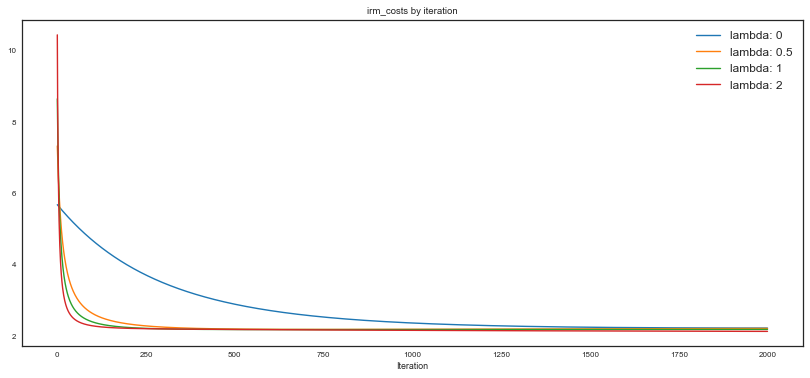

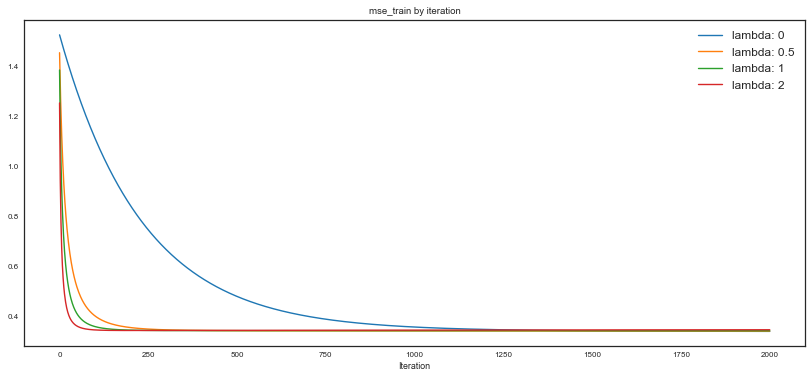

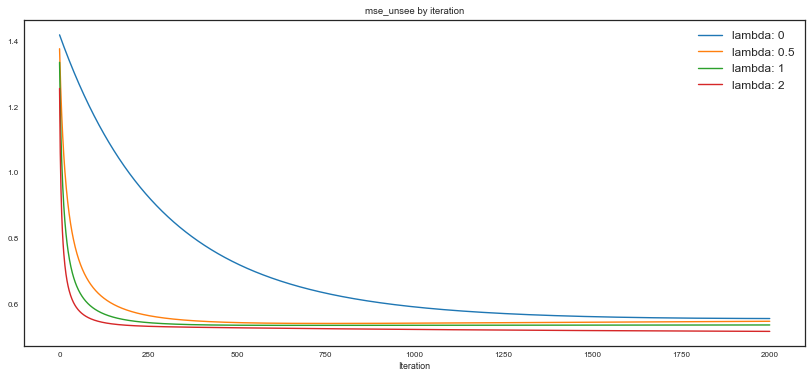

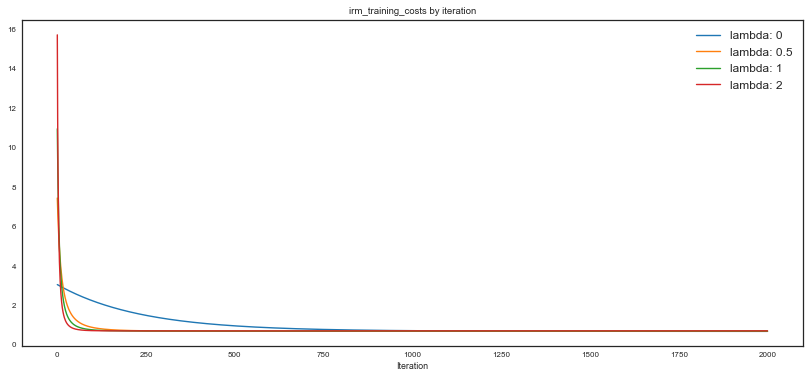

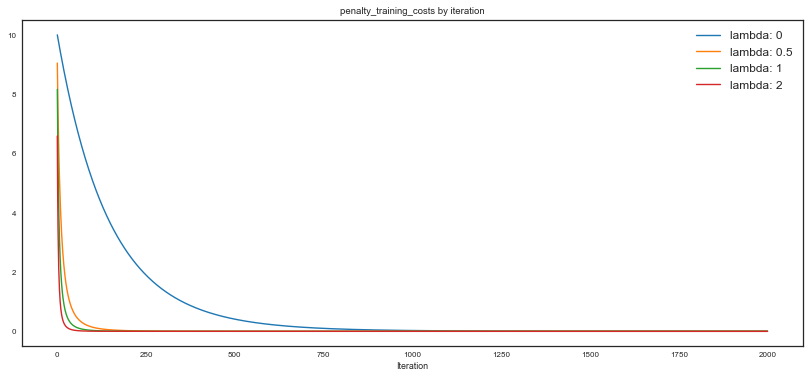

Best lambda: 2
Best params: [0.79814198 0.27794525]


In [21]:
thetas = [1, 1]
params = invariant_risk_minimization(X,
                                     y,
                                     thetas,
                                     LEARNING_RATE, 
                                     2000,
                                     X_unseen,
                                     y_unseen,
                                     verbose=True)

In [23]:
def plot_period_errors(X, y_true, y_challenger, y_baseline, y_perfect, unseen_enviroments, savefig=False):    
    data = X[["env"]].copy(deep=True)
    data["IRM"] = np.power(y_true - y_challenger, 2)
    data["ERM"] = np.power(y_true - y_baseline, 2)
    data["Oracle"] = np.power(y_true - y_perfect, 2)    

    data = data.melt(id_vars=["env"], var_name="modelo", value_name="error")
    
    ### Total error
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    unseen = data[data["env"].isin(unseen_environments)]    
    train = data[~data["env"].isin(unseen_environments)]
    
    sns.barplot(data=train, x="modelo", y="error", color="#3274a1")
    plt.ylabel("Error in training environments", fontsize=16)    
    plt.xlabel("Model", fontsize=16)       
    plt.legend(fontsize=12, bbox_to_anchor=(1.01, 1.00))
    if savefig:
        plt.savefig("../images/literature__irm__error_training_environment.eps", format="eps")
    plt.show()
    plt.clf()

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    sns.barplot(data=unseen, x="modelo", y="error", color="#3274a1")
    plt.ylabel("Error in unseen environments", fontsize=16)   
    plt.xlabel("Model", fontsize=16)        
    plt.legend(fontsize=12, bbox_to_anchor=(1.01, 1.00))
    if savefig:
        plt.savefig("../images/literature__irm__error_unseen_environment.eps", format="eps")
    plt.show()
    plt.clf()
    
    ### Error by environment
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    sns.barplot(data=data, y="error", x="env", hue="modelo")
    plt.xlabel("Environment", fontsize=16)
    plt.ylabel("Error", fontsize=16)   
    plt.legend(fontsize=12, bbox_to_anchor=(0.21, 1.00))
    if savefig:
        plt.savefig("../images/literature__irm__error_by_environment.eps", format="eps")
    plt.show()

In [24]:
entire_X = pd.concat([data, unseen_data])
entire_X["env"] = entire_X["period"]

y_true = entire_X["y"].values
y_challenger = entire_X[features].values @ params
y_baseline = entire_X[features].values @ baseline_params
y_perfect = entire_X[features].values @ np.array([1, 0])

No handles with labels found to put in legend.


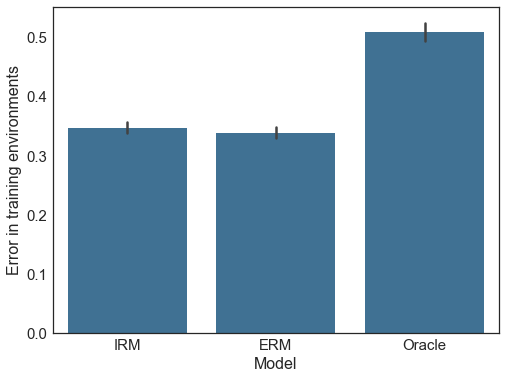

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

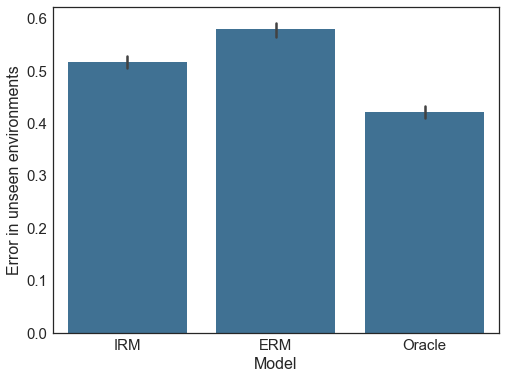

<Figure size 864x288 with 0 Axes>

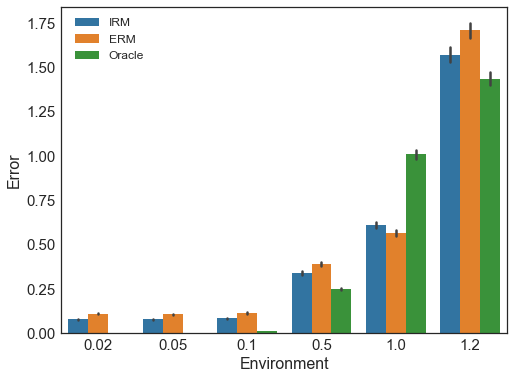

In [25]:
plot_period_errors(entire_X, y_true, y_challenger, y_baseline, y_perfect, unseen_environments, savefig=True)

## Different equations

In [26]:
periods = [0.1, 1]
data = pd.DataFrame()
data["period"] = np.concatenate([int(POPULATION/2) * [period] for period in periods],
                               axis=0)
data["x_1"] = data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
data["y"] = data.apply(lambda x: 0.5 * x["x_1"] + np.random.normal(0, 1) * x["period"], axis=1)
data["x_2"] = data.apply(lambda x: x["y"] + np.random.normal(0, 1), axis=1)



periods = [0.05, 0.02, 0.5, 1.2]
unseen_environments = periods
unseen_data = pd.DataFrame()
unseen_data["period"] = np.concatenate([int(POPULATION/2) * [period] for period in periods],
                               axis=0)
unseen_data["x_1"] = unseen_data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
unseen_data["y"] = unseen_data.apply(lambda x: 0.5 * x["x_1"] + np.random.normal(0, 1) * x["period"], axis=1)
unseen_data["x_2"] = unseen_data.apply(lambda x: np.random.normal(0, 1), axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[features + [environment]], 
                                                    data[target],
                                                    test_size=0.5,
                                                    stratify=data[environment],
                                                    random_state=42)

X_unseen = unseen_data[features + [environment]].values
y_unseen = unseen_data[target]

X = X_train[["x_1", "x_2", "period"]].values
X_test = X_test.values
y = y_train.values

print(X_train.shape)
print(X_test.shape)
print(X_unseen.shape)
print(y_train.shape)
print(y_test.shape)
print(y_unseen.shape)

(10000, 3)
(10000, 3)
(40000, 3)
(10000,)
(10000,)
(40000,)


****************************************
Training with lambda: 0
****************************************
------------------------------------------
Iteration 0
Params: [0.99950816 0.99875326]
Penalty error: 7.070821697148139
Error: 1.499894732750233
IRM train loss: 2.999789465500466
Penalty gradient: [10.17360878 26.75577444]
Error gradient: [0.49183605 1.24673734]
Final gradient: [0.49183605 1.24673734]
------------------------------------------
Iteration 1000
Params: [0.6875589  0.41008105]
Penalty error: 0.10283822189666325
Error: 0.4286279572090089
IRM train loss: 0.8572559144180179
Penalty gradient: [0.48562098 1.18025369]
Error gradient: [0.19566475 0.21164939]
Final gradient: [0.19566475 0.21164939]
------------------------------------------
Iteration 2000
Params: [0.54552424 0.31722121]
Penalty error: 0.010555963191840689
Error: 0.36420259532805516
IRM train loss: 0.7284051906561102
Penalty gradient: [0.03143031 0.19071381]
Error gradient: [0.10307373 0.02597563]
Final gradien

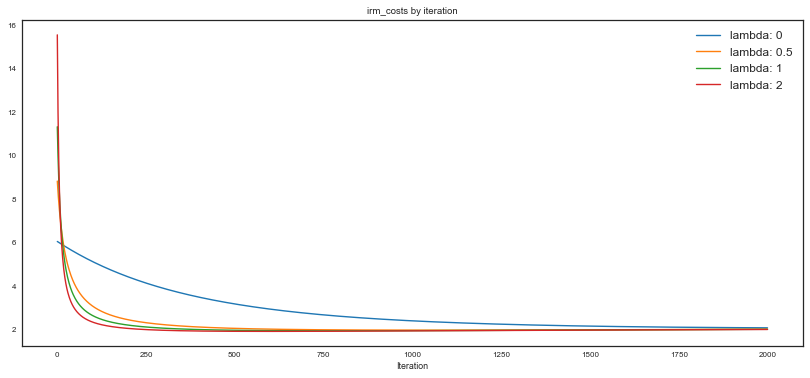

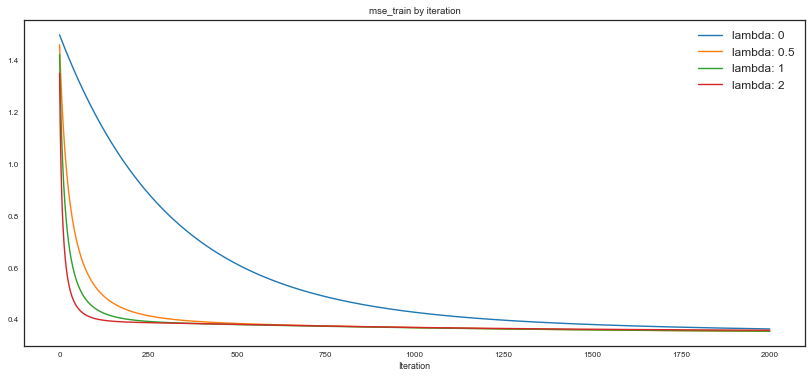

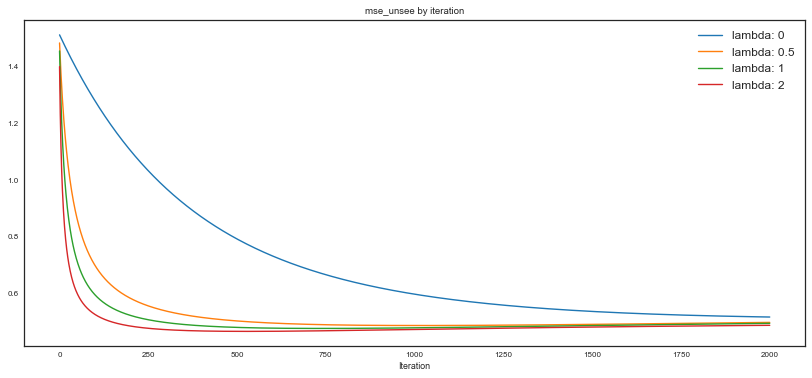

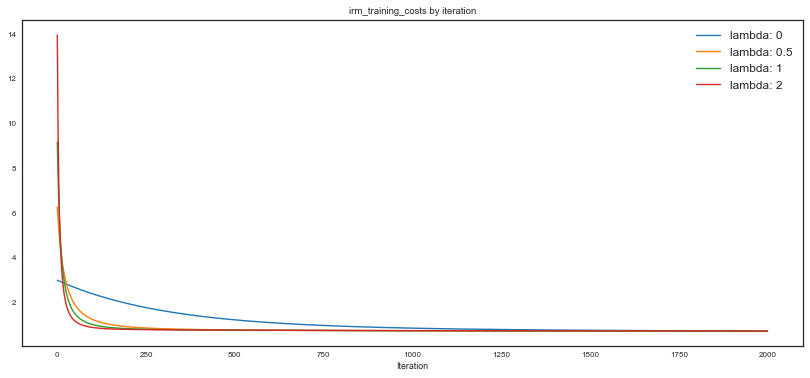

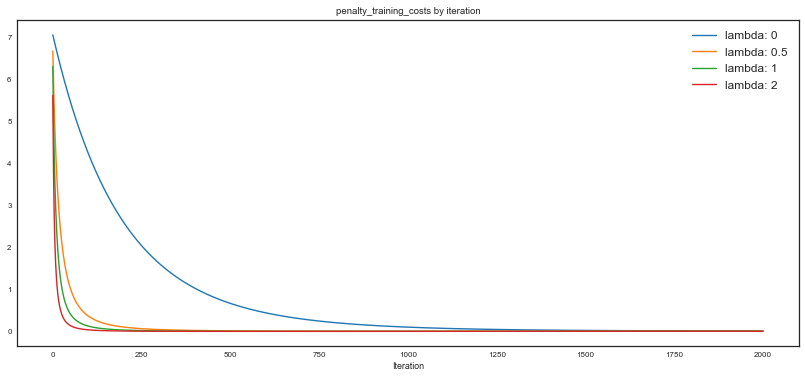

Best lambda: 2
Best params: [0.5061998  0.26811372]


In [28]:
thetas = [1, 1]
params = invariant_risk_minimization(X,
                                     y,
                                     thetas,
                                     LEARNING_RATE, 
                                     2000,
                                     X_unseen,
                                     y_unseen,
                                     verbose=True)

In [30]:
errors, baseline_params = gradient_descent(X[:, :-1], y, thetas, 0.1, 5000)
print(baseline_params)

[0.32908642 0.3333143 ]


In [31]:
entire_X = pd.concat([data, unseen_data])
entire_X["env"] = entire_X["period"]

y_true = entire_X["y"].values
y_challenger = entire_X[features].values @ params
y_baseline = entire_X[features].values @ baseline_params
y_perfect = entire_X[features].values @ np.array([0.5, 0])

No handles with labels found to put in legend.


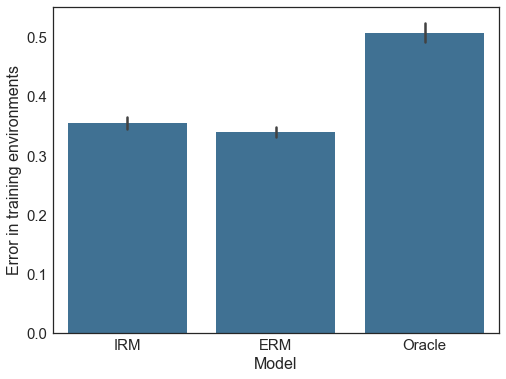

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

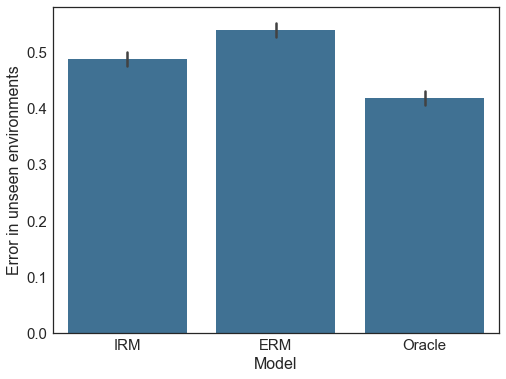

<Figure size 864x288 with 0 Axes>

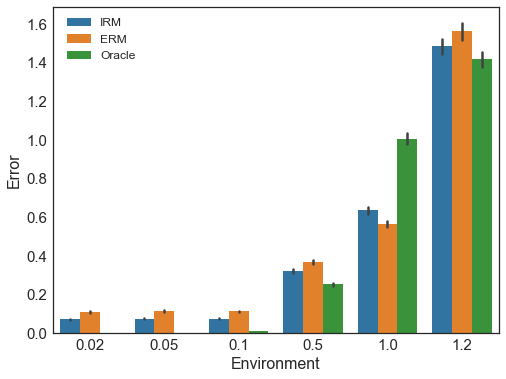

In [32]:
plot_period_errors(entire_X, y_true, y_challenger, y_baseline, y_perfect, unseen_environments)

## Different structure

In [33]:
periods = [0.1, 1]
data = pd.DataFrame()
data["period"] = np.concatenate([int(POPULATION/2) * [period] for period in periods],
                               axis=0)
data["x_1"] = data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
data["x_3"] = data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
data["y"] = data.apply(lambda x: x["x_1"] + 0.5 * x["x_3"] + np.random.normal(0, 1) * x["period"], axis=1)
data["x_2"] = data.apply(lambda x: x["y"] + np.random.normal(0, 1), axis=1)
data["x_4"] = data.apply(lambda x: 0.5 * x["y"] + np.random.normal(0, 1), axis=1)

periods = [0.05, 0.02, 0.5]
unseen_environments = periods
unseen_data = pd.DataFrame()
unseen_data["period"] = np.concatenate([int(POPULATION/2) * [period] for period in periods],
                               axis=0)
unseen_data["x_1"] = unseen_data.apply(lambda x: np.random.normal(0, 1) * x["period"], axis=1)
unseen_data["x_3"] = unseen_data.apply(lambda x: np.random.normal(0.1, 1) * x["period"], axis=1)
unseen_data["y"] = unseen_data.apply(lambda x: 1 * x["x_1"] + 0.5 * x["x_3"] + np.random.normal(0, 1) * x["period"], axis=1)
unseen_data["x_2"] = unseen_data.apply(lambda x: np.random.normal(0, 1), axis=1)
unseen_data["x_4"] = unseen_data.apply(lambda x: np.random.normal(0, 1), axis=1)

features = ["x_1", "x_2", "x_3", "x_4"]
perfect_params = np.array([1, 0, 1, 0])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data[features + [environment]], 
                                                    data[target],
                                                    test_size=0.5,
                                                    stratify=data[environment],
                                                    random_state=42)

X_unseen = unseen_data[features + [environment]].values
y_unseen = unseen_data[target]

X = X_train[features + ["period"]].values
X_test = X_test.values
y = y_train.values

print(X_train.shape)
print(X_test.shape)
print(X_unseen.shape)
print(y_train.shape)
print(y_test.shape)
print(y_unseen.shape)

(10000, 5)
(10000, 5)
(30000, 5)
(10000,)
(10000,)
(30000,)


In [35]:
thetas = np.ones(len(features))
errors, baseline_params = gradient_descent(X[:, :-1], y, thetas, 0.1, 5000)
print(baseline_params)

[0.60779795 0.30925388 0.31497111 0.14500718]


****************************************
Training with lambda: 0
****************************************
------------------------------------------
Iteration 0
Params: [0.99921757 0.9976457  0.99934435 0.99827522]
Penalty error: 83.53646786901608
Error: 4.139653049996667
IRM train loss: 8.279306099993335
Penalty gradient: [ 69.57134096 198.62722615  43.28770859 113.90451643]
Error gradient: [0.78242706 2.35429964 0.65564694 1.7247782 ]
Final gradient: [0.78242706 2.35429964 0.65564694 1.7247782 ]
------------------------------------------
Iteration 1000
Params: [0.72083026 0.24047617 0.66347343 0.28964577]
Penalty error: 0.14851026112391524
Error: 0.3979083570696736
IRM train loss: 0.7958167141393473
Penalty gradient: [0.74502957 2.40101279 0.37491634 1.16464352]
Error gradient: [0.06335332 0.09014998 0.17789088 0.22956464]
Final gradient: [0.06335332 0.09014998 0.17789088 0.22956464]
------------------------------------------
Iteration 2000
Params: [0.69080664 0.24002682 0.53433699 0

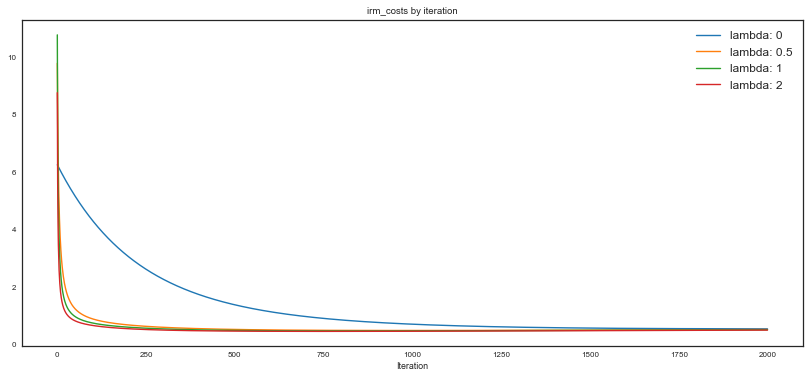

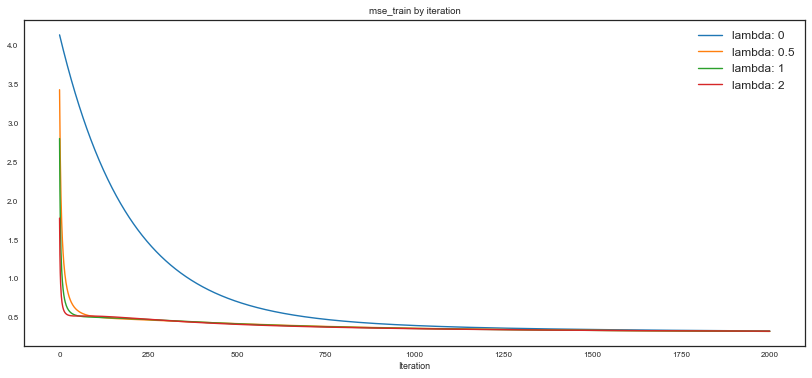

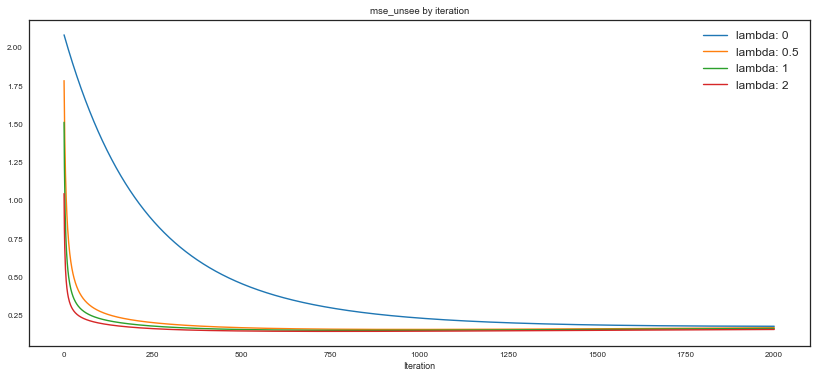

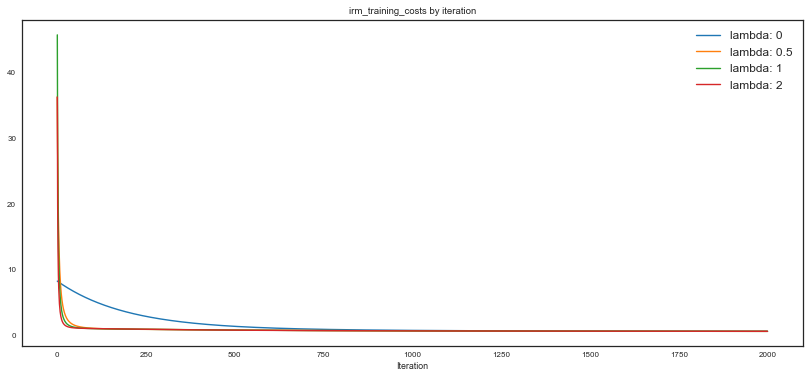

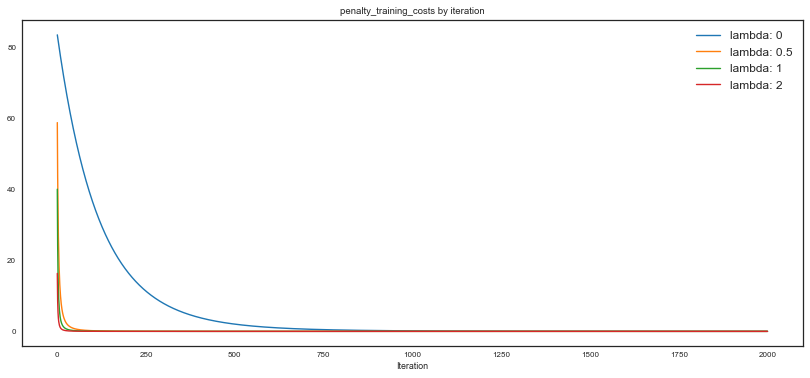

Best lambda: 2
Best params: [0.71381473 0.23193027 0.519826   0.12020325]


In [37]:
thetas = np.ones(len(features))
params = invariant_risk_minimization(X,
                                     y,
                                     thetas,
                                     LEARNING_RATE, 
                                     2000,
                                     X_unseen,
                                     y_unseen,
                                     verbose=True)

In [38]:
perfect_params = np.array([1, 0, 1, 0])
entire_X = pd.concat([data, unseen_data])
entire_X["env"] = entire_X["period"]

y_true = entire_X["y"].values
y_challenger = entire_X[features].values @ params
y_baseline = entire_X[features].values @ baseline_params
y_perfect = entire_X[features].values @ perfect_params

In [39]:
baseline_params

array([0.60779795, 0.30925388, 0.31497111, 0.14500718])

In [40]:
params

array([0.71381473, 0.23193027, 0.519826  , 0.12020325])

No handles with labels found to put in legend.


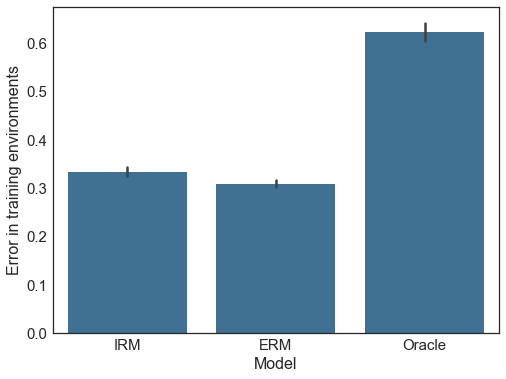

No handles with labels found to put in legend.


<Figure size 864x288 with 0 Axes>

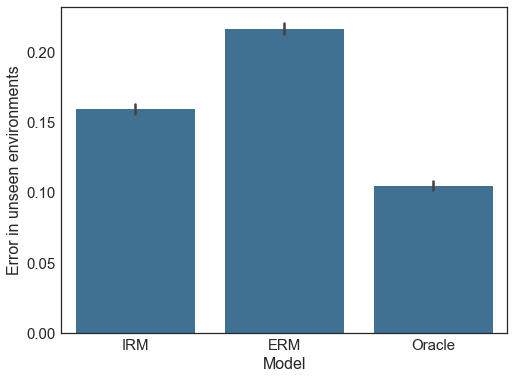

<Figure size 864x288 with 0 Axes>

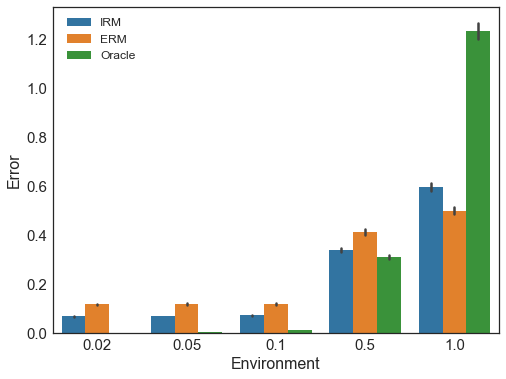

In [41]:
plot_period_errors(entire_X,
                   y_true, 
                   y_challenger,
                   y_baseline, 
                   y_perfect, 
                   unseen_environments)